In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/PhishTank/Base_classifier_result(pre URL cross)(2).csv")
data

,labels,rfc_prediction_non,rfc_prediction_phish,svc_prediction_non,svc_prediction_phish,lr_prediction_non,lr_prediction_phish
0,0,0.887871,0.112129,0.970192,0.029808,0.999077,0.000923
1,0,0.988243,0.011757,0.974128,0.025872,0.950621,0.049379
2,0,0.995337,0.004663,0.993949,0.006051,0.997517,0.002483
3,0,0.939165,0.060835,0.978377,0.021623,0.782452,0.217548
4,0,0.988243,0.011757,0.974128,0.025872,0.950621,0.049379
...,...,...,...,...,...,...,...
4647,0,0.661663,0.338337,0.707679,0.292321,0.882528,0.117472
4648,1,0.052999,0.947001,0.071019,0.928981,0.216068,0.783932
4649,0,0.988243,0.011757,0.974995,0.025005,0.943967,0.056033
4650,0,0.637768,0.362232,0.654743,0.345257,0.039350,0.960650


In [4]:
data.shape

(4652, 7)

In [5]:
data.columns

Index(['labels', 'rfc_prediction_non', 'rfc_prediction_phish',
       'svc_prediction_non', 'svc_prediction_phish', 'lr_prediction_non',
       'lr_prediction_phish'],
      dtype='object')

In [6]:
data.describe()

,labels,rfc_prediction_non,rfc_prediction_phish,svc_prediction_non,svc_prediction_phish,lr_prediction_non,lr_prediction_phish
count,4652.000000,4652.000000,4652.000000,4652.000000,4652.000000,4.652000e+03,4.652000e+03
mean,0.435727,0.567789,0.432211,0.566568,0.433432,5.682745e-01,4.317255e-01
std,0.495905,0.460607,0.460607,0.456808,0.456808,4.569641e-01,4.569641e-01
min,0.000000,0.000000,0.000374,0.000000,0.000614,2.695765e-07,4.269809e-47
25%,0.000000,0.005887,0.011757,0.010078,0.015126,8.379816e-04,1.040323e-02
50%,0.000000,0.931988,0.068012,0.909997,0.090003,9.136143e-01,8.638571e-02
75%,1.000000,0.988243,0.994113,0.984874,0.989922,9.895968e-01,9.991620e-01
max,1.000000,0.999626,1.000000,0.999386,1.000000,1.000000e+00,9.999997e-01


In [7]:
import numpy as np


y = data['labels'].values
x = np.array(data.drop('labels',axis=1))


print(x.shape, y.shape)

(4652, 6) (4652,)


In [8]:

import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


def model_aa(x_train, x_val, y_train, y_val, opt, early_stopping_monitor):

  n_cols = x_train.shape[1]
  # print("check point")
  #create model
  model = Sequential()
  model.add(Dense(30, activation='relu', input_shape=(n_cols,)))
  model.add(Dense(10, activation='relu'))

  model.add(Dense(1, activation = 'sigmoid'))
  # softmax
  #compile model using mse as a measure of model performance
  model.compile(optimizer = opt, loss= 'binary_crossentropy', metrics=["accuracy"])

  history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping_monitor])


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()


  print('Validation Accuracy: ')
  # Predicting the Test set results
  y_pred = model.predict(x_val)
  y_pred = (y_pred > 0.5)


  print(classification_report(y_val, y_pred))

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

  # Creating the Confusion Matrix
  cm = confusion_matrix(y_val, y_pred)
  print(cm)
  print('Precision: %.4f' % precision_score(y_val, y_pred))
  print('Recall: %.4f' % recall_score(y_val, y_pred))
  print('F1 Score: %.4f' % f1_score(y_val, y_pred))
  return metrics.accuracy_score(y_val, y_pred)



Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.3869 - accuracy: 0.8930 - val_loss: 0.1849 - val_accuracy: 0.9785
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1167 - accuracy: 0.9811 - val_loss: 0.0773 - val_accuracy: 0.9785
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 0.9823 - val_loss: 0.0529 - val_accuracy: 0.9807
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0476 - accuracy: 0.9835 - val_loss: 0.0451 - val_accuracy: 0.9807
Epoch 5/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.9835 - val_loss: 0.0411 - val_accuracy: 0.9807
Epoch 6/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0406 - accuracy: 0.9840 - val_loss: 0.0386 - val_accuracy: 0.9807
Epoch 7/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 0.9845 - val_loss: 0.0370 - val_accuracy: 0.9807

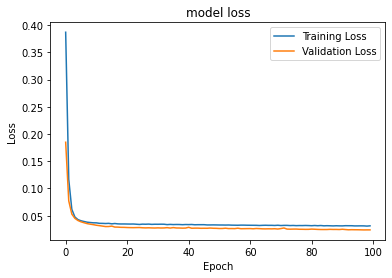

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       267
           1       0.98      0.99      0.99       199

    accuracy                           0.99       466
   macro avg       0.99      0.99      0.99       466
weighted avg       0.99      0.99      0.99       466

Accuracy: 0.9892703862660944
[[264   3]
 [  2 197]]
Precision: 0.9850
Recall: 0.9899
F1 Score: 0.9875
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.1934 - accuracy: 0.9828 - val_loss: 0.0500 - val_accuracy: 0.9828
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0453 - accuracy: 0.9842 - val_loss: 0.0370 - val_accuracy: 0.9850
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0401 - accuracy: 0.9840 - val_loss: 0.0340 - val_accuracy: 0.9850
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9852 - val_loss: 0.0330 

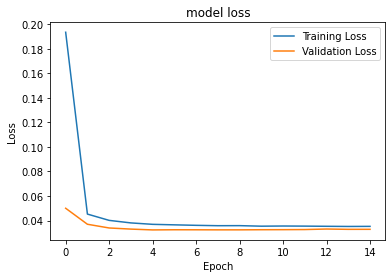

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       262
           1       0.99      0.98      0.98       204

    accuracy                           0.98       466
   macro avg       0.99      0.98      0.98       466
weighted avg       0.98      0.98      0.98       466

Accuracy: 0.9849785407725322
[[259   3]
 [  4 200]]
Precision: 0.9852
Recall: 0.9804
F1 Score: 0.9828
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.1896 - accuracy: 0.9283 - val_loss: 0.0380 - val_accuracy: 0.9871
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9828 - val_loss: 0.0236 - val_accuracy: 0.9914
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9845 - val_loss: 0.0227 - val_accuracy: 0.9914
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0386 - accuracy: 0.9845 - val_loss: 0.0237 

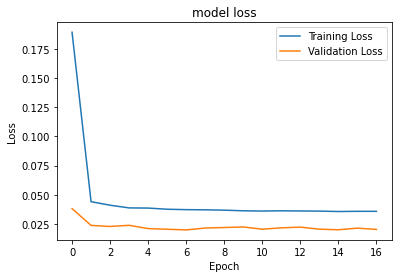

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       267
           1       1.00      0.98      0.99       198

    accuracy                           0.99       465
   macro avg       0.99      0.99      0.99       465
weighted avg       0.99      0.99      0.99       465

Accuracy: 0.9913978494623656
[[267   0]
 [  4 194]]
Precision: 1.0000
Recall: 0.9798
F1 Score: 0.9898
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.2198 - accuracy: 0.9764 - val_loss: 0.0618 - val_accuracy: 0.9742
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0422 - accuracy: 0.9852 - val_loss: 0.0554 - val_accuracy: 0.9785
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0378 - accuracy: 0.9859 - val_loss: 0.0544 - val_accuracy: 0.9828
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0362 - accuracy: 0.9861 - val_loss: 0.0545 

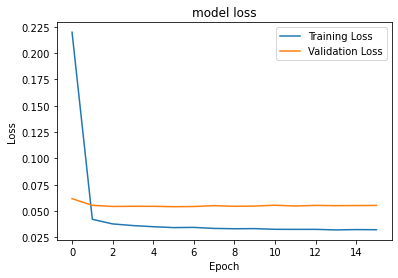

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       260
           1       0.98      0.98      0.98       205

    accuracy                           0.98       465
   macro avg       0.98      0.98      0.98       465
weighted avg       0.98      0.98      0.98       465

Accuracy: 0.9806451612903225
[[256   4]
 [  5 200]]
Precision: 0.9804
Recall: 0.9756
F1 Score: 0.9780
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.1732 - accuracy: 0.9577 - val_loss: 0.0404 - val_accuracy: 0.9871
Epoch 2/100
131/131 [==============================] - 1s 6ms/step - loss: 0.0444 - accuracy: 0.9833 - val_loss: 0.0376 - val_accuracy: 0.9892
Epoch 3/100
131/131 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 0.9840 - val_loss: 0.0383 - val_accuracy: 0.9892
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0374 - accuracy: 0.9845 - val_loss: 0.0398 

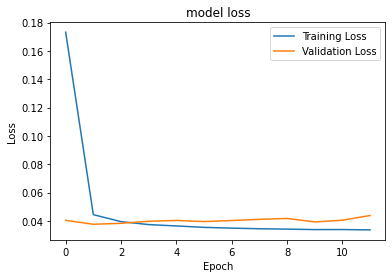

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       253
           1       0.97      1.00      0.99       212

    accuracy                           0.99       465
   macro avg       0.99      0.99      0.99       465
weighted avg       0.99      0.99      0.99       465

Accuracy: 0.9870967741935484
[[247   6]
 [  0 212]]
Precision: 0.9725
Recall: 1.0000
F1 Score: 0.9860
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.1384 - accuracy: 0.9816 - val_loss: 0.0684 - val_accuracy: 0.9763
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0423 - accuracy: 0.9835 - val_loss: 0.0653 - val_accuracy: 0.9763
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0384 - accuracy: 0.9854 - val_loss: 0.0609 - val_accuracy: 0.9742
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0369 - accuracy: 0.9857 - val_loss: 0.0614 

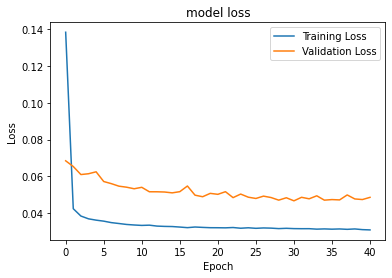

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       266
           1       0.97      0.99      0.98       199

    accuracy                           0.98       465
   macro avg       0.98      0.98      0.98       465
weighted avg       0.98      0.98      0.98       465

Accuracy: 0.9827956989247312
[[260   6]
 [  2 197]]
Precision: 0.9704
Recall: 0.9899
F1 Score: 0.9801
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.2296 - accuracy: 0.9529 - val_loss: 0.0736 - val_accuracy: 0.9806
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0562 - accuracy: 0.9828 - val_loss: 0.0467 - val_accuracy: 0.9806
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0434 - accuracy: 0.9847 - val_loss: 0.0465 - val_accuracy: 0.9806
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0397 - accuracy: 0.9850 - val_loss: 0.0394 

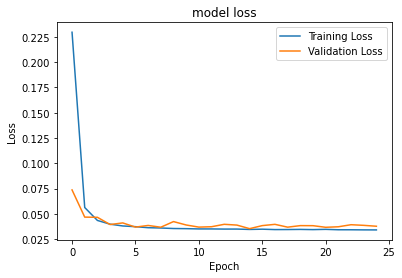

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       266
           1       1.00      0.96      0.98       199

    accuracy                           0.98       465
   macro avg       0.99      0.98      0.98       465
weighted avg       0.98      0.98      0.98       465

Accuracy: 0.9827956989247312
[[266   0]
 [  8 191]]
Precision: 1.0000
Recall: 0.9598
F1 Score: 0.9795
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.1867 - accuracy: 0.9594 - val_loss: 0.0627 - val_accuracy: 0.9806
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0512 - accuracy: 0.9830 - val_loss: 0.0419 - val_accuracy: 0.9828
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 0.9833 - val_loss: 0.0358 - val_accuracy: 0.9849
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0398 - accuracy: 0.9842 - val_loss: 0.0329 

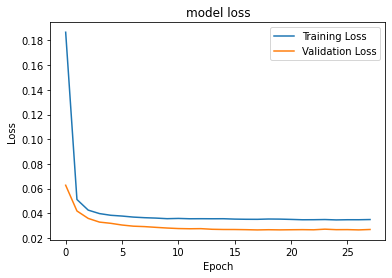

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       275
           1       0.97      0.98      0.98       190

    accuracy                           0.98       465
   macro avg       0.98      0.98      0.98       465
weighted avg       0.98      0.98      0.98       465

Accuracy: 0.9827956989247312
[[270   5]
 [  3 187]]
Precision: 0.9740
Recall: 0.9842
F1 Score: 0.9791
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.1726 - accuracy: 0.9809 - val_loss: 0.0431 - val_accuracy: 0.9892
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0434 - accuracy: 0.9838 - val_loss: 0.0371 - val_accuracy: 0.9892
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0398 - accuracy: 0.9847 - val_loss: 0.0353 - val_accuracy: 0.9892
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.9840 - val_loss: 0.0342 

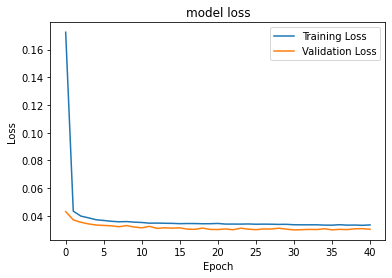

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       259
           1       0.99      0.99      0.99       206

    accuracy                           0.99       465
   macro avg       0.99      0.99      0.99       465
weighted avg       0.99      0.99      0.99       465

Accuracy: 0.989247311827957
[[256   3]
 [  2 204]]
Precision: 0.9855
Recall: 0.9903
F1 Score: 0.9879
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.1768 - accuracy: 0.9592 - val_loss: 0.0409 - val_accuracy: 0.9849
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9835 - val_loss: 0.0312 - val_accuracy: 0.9892
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0407 - accuracy: 0.9833 - val_loss: 0.0296 - val_accuracy: 0.9871
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9852 - val_loss: 0.0280 -

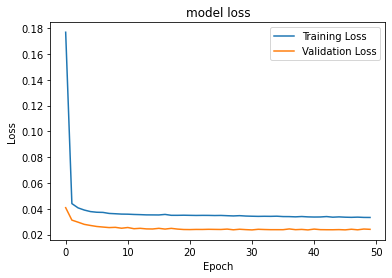

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       250
           1       0.98      0.99      0.99       215

    accuracy                           0.99       465
   macro avg       0.99      0.99      0.99       465
weighted avg       0.99      0.99      0.99       465

Accuracy: 0.9870967741935484
[[246   4]
 [  2 213]]
Precision: 0.9816
Recall: 0.9907
F1 Score: 0.9861
Average Validation Accuracy: 0.9858119894780559


In [9]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0
kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x, y):
  val_acc = model_aa(x[train], x[val], y[train], y[val], optimizer1, early_stopping_monitor)
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)

